In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Tri par sélection et par insertion</span>

## 1. Implémentation des tris

### 1.1 Tri par sélection

**Fonction** tri_selection_en_place (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> *float* : mini  *# La valeur minimale trouvée*  
> *int* : i_mini *# L'indice de la valeur minimale trouvée*  
> n $\leftarrow$ taille(tab)  
> *# i correspond au premier indice du tableau restant à trier, quand i=n-2 le tableau à trier correspond aux 2 derniers éléments de tab*  
> **Pour** i allant de 0 à n-2 **faire**   
>> i_mini $\leftarrow$ i  *# On initialise avec le premier indice du tableau à trier.*  
>> mini $\leftarrow$ tab[i]  *# On initialise avec la première valeur du tableau à trier.*  
>> **Pour** j allant de i+1 à n-1 **faire**  *# On parcourt le reste du tableau à trier.*
>>> **Si** tab[j] < mini **alors**  *# Si on trouve une valeur plus petite on met à jour i_mini et mini.*  
>>>> i_mini $\leftarrow$ j  
>>>> mini $\leftarrow$ tab[j]  
>>
>> **Permuter** tab[i] et tab[i_mini]  *# On permute la première valeur du tableau non-trié avec le minimum trouvé*

**Q1. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par sélection en Python.**

In [42]:
#Question 1
def tri_selection_en_place(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place par sélection (tab est modifié mais la fonction ne retourne rien)."""

### 1.2 Tri par insertion

**Fonction** tri_insertion_en_place (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> n $\leftarrow$ taille(tab)  
> *# i correspond au dernier indice du tableau déjà trié, quand i=n-2 il ne reste plus qu'à insérer au bon endroit le dernier élément du tableau, c'est donc bien la dernière itération.*  
> **Pour** i allant de 0 à n-2 **faire**   
>> j $\leftarrow$ i+1  *# j est l'indice de la valeur à insérer dans le tableau déjà trié.*  
>> **Tant que** j >0 **et** tab[j]<tab[j-1] **faire**  *# L'indice j de la valeur à insérer est décrémentée tant qu'on est pas au début du tableau et qu'on a pas trouvé une valeur supérieure à sa gauche.*
>>> **Permuter** tab[j] et tab[j-1]  *# On permute la valeur à insérer avec celle qui est à sa gauche.*  
>>> j $\leftarrow$ j-1  *# On décrémente j puisque la valeur à insérer est décalée d'un cran vers la gauche.*

**Q2. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par insertion en Python.**

In [43]:
# Question 2
def tri_insertion_en_place(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place par insertion (tab est modifié mais la fonction ne retourne rien)."""

### 1.3 Test des tris

**Utiliser le code ci-dessous pour tester vos algorithmes de tri sur une liste d'entiers aléatoires.** On pourra faire varier la taille $N$ de la liste et les bornes inférieures et supérieures `valMin` et `valMax` des valeurs aléatoires et on utlisera **les 2 fonctions de tri** précédentes. Dans tous les cas, **on vérifiera juste que les liste affichées après le tri sont bien triées par ordre croissant**.

In [44]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10

L = [randint(valMin,valMax) for i in range(N)]
#Affichage de la liste aléatoire et du résultat du tri par sélection
print('Liste de départ :',L)
tri_selection_en_place(L)
print('Liste triée :',L)

L = [randint(valMin,valMax) for i in range(N)]
#Affichage de la liste aléatoire et du résultat du tri par insertion
print('Liste de départ :',L)
tri_insertion_en_place(L)
print('Liste triée :',L)

Liste de départ : [3, 2, 8, 0, 4, 6, 0, 6, 8, 5]
Liste triée : [0, 0, 2, 3, 4, 5, 6, 6, 8, 8]
Liste de départ : [4, 8, 6, 0, 3, 10, 8, 5, 5, 10]
Liste triée : [0, 3, 4, 5, 5, 6, 8, 8, 10, 10]


Pour le moment, le tri se fait **en place**, ce qui complique un peu les tests de comparaison entre nos deux algorithmes. En effet, si je lance les deux tris à la suite sur la même liste, le deuxième tri s'effectuera sur une liste déjà triée puisque la liste de départ est modifiée. Je ne peux donc **pas comparer les deux algorithmes** sur la même liste aléatoire de départ. C'est pour cela que dans le code précédent, il faut générer deux fois la liste aléatoire de départ.

Pour que le tri ne se face pas en place, il faut créer une copy du tableau donné en argument avec l'instruction `tabCopy=list(tab)` par exemple. Puis on trie `tabCopy` et on le retourne comme résultat une fois entièrement trié.

De plus, afin de vérifier que le tri par insertion a une complexité moindre (plus efficace) que le tri par sélection, on peut dans un premier temps ajouter dans leurs algorithme un *compteur d'itérations* que l'on incrémente de 1, à chaque fois que l'on passe dans la deuxième boucle.

**Q3. A partir des deux premières fonctions, écrire les fonctions `tri_selection(tab)` et `tri_insertion(tab)` afin qu'elles retournent un résultat de la forme `[liste triée, nbIter]` et sans modifier la liste passée en argument (pas de tri en place).**

In [45]:
# Question 3
def tri_selection(tab):
    """tab est un tableau de n valeurs numériques. On crée une copie tabCopy de tab, on la trie par sélection et on renvoie [tabCopy, compt] où compt est le nombre total d'itérations ."""

def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques. On crée une copie tabCopy de tab, on la trie par insertion et on renvoie [tabCopy, compt] où compt est le nombre total d'itérations."""


 **Tester les fonctions de tri modifiées avec le code ci-dessous à compléter.**  
 Les deux tris devraient évidemment donner le même résultat (même liste triée) mais le tri par insertion devrait demander environ deux fois moins d'itérations que le tri par sélection.

In [46]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :', L)
L1=tri_selection(L)
L2=tri_insertion(L)
print('Liste triée par sélection :',," Nombre d'itérations :",) #Ligne à compléter
print('Liste triée par insertion :',," Nombre d'itérations :",) #Ligne à compléter

Liste de départ : [9, 6, 0, 10, 5, 5, 6, 3, 9, 2]
Liste triée par sélection : [0, 2, 3, 5, 5, 6, 6, 9, 9, 10]  Nombre d'itérations : 45
Liste triée par insertion : [0, 2, 3, 5, 5, 6, 6, 9, 9, 10]  Nombre d'itérations : 26


## 2. Mesures de complexité

### 2.1 Comparaison des algorithmes

Dans le code ci-dessous, la commande `timeit` permet de comparer le temps d'exécution des tris pas insertion et par sélection, ainsi que le tri intégré dans Python (fonction `sorted`) qui est basée sur l'algorithme *timsort* (association du tri fusion et du tri par insertion). Ce dernier est bien mieux optimisé et donc bien plus rapide que nos tris *faits maison*.

In [47]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
50.8 ms ± 679 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
80.9 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
114 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Remarque importante :**

En moyenne, le **tri par insertion devrait être environ 2 fois plus rapide que le tri par sélection** puisqu'il demande environ deux fois moins d'itérations mais ce n'est pas ce qu'on observe ci-dessus. D'après nos mesures, le tri par insertion se révèle même plus lent que pour le tri par sélection.  
Ceci montre que la réalité est toujours plus complexe que la théorie. En effet, même s'il fait moins d'itérations, un algorithme peut être plus long à s'exécuter si les opérations élémentaires exécutées lors d'une itération sont plus longues. Justement parce qu'en fait, ce ne sont **pas vraiment des opérations élémentaires** !

Pour l'illustrer, on peut tester un algorithme légèrement amélioré pour le tri par insertion.

**Tri par insertion amélioré**  
Comme indiqué dans la partie cours, on peut un peu améliorer le tri par insertion en insérant réellement la valeur qu'on est en train de trier au bon endroit au lieu de la faire descendre pas à pas jusqu'à la bonne place.

In [48]:
def tri_insertion_ameliore(tab):
    """tab est un tableau de n valeurs numériques. On crée une copie tabCopy de tab, on la trie par insertion et on renvoie [tabCopy, compt] où compt est le nombre total d'itérations."""
    n=len(tab)
    compt=0
    tabCopy=list(tab)
    for i in range (n-1):
        j=i+1
        tmp=tabCopy[j]
        while j>0 and tmp<tabCopy[j-1]:
            tabCopy[j]=tabCopy[j-1]
            j=j-1
            compt=compt+1
        tabCopy[j]=tmp
    return [tabCopy,compt]

**Nouvelle mesure des temps d'exécution :**

In [49]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour tri par insertion amélioré :")
%timeit tri_insertion_ameliore(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
67.6 ms ± 3.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
95.8 ms ± 5.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion amélioré :
67.7 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
135 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Résultat :**
Dans cette version améliorée, le tri par insertion devient à peu près aussi rapide que le tri par sélection mais il n'est toujours pas plus rapide. Ceci est du au **fonctionnement propre de Python qui est nettement plus lent pour écrire dans une liste que pour faire des comparaisons**. Or le tri par sélection fait beaucoup de comparaisons mais peu d'écriture alors que c'est plutôt l'inverse pour le tri par insertion. Ce dernier est donc défavorisé par Python.

### 2.2 Pire et meilleur des cas

Le tri par sélection fonctionne de la même façon quelle que soit la liste fournie en entrée. Par contre, nous avons vu que que **le fonctionnement du tri par insertion pouvait varier selon les cas**. La comparaison précédente donne-t-elle le même résultat dans le pire et le meilleur cas pour le tri par insertion ?

**En théorie**, les 2 algorithmes sont **équivalents dans le pire des cas** (liste triée en sens inverse) mais le **tri par insertion devient linéaire** et donc beaucoup plus rapide que le tri par sélection **dans le meilleur des cas** (liste déjà triée).

**Q4. Dans le programme précédent, modifier la liste L fournie en entrée afin de renouveler la comparaison, mais cette fois dans le pire et le meilleur des cas (pour l'agorithme de tri par insertion).**

In [50]:
# Question 4
N=1000
#Création d'une Liste de N entiers dans le pire des cas
L = [randint(0,N) for i in range(N)]
print("PIRE DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

#Création d'une Liste de N entiers dans le meilleur des cas
L = [randint(0,N) for i in range(N)]

print("MEILLEUR DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

PIRE DES CAS :
Durée d'exécution pour le tri par sélection :
75.1 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
198 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Durée d'exécution pour timsort :
51.6 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
MEILLEUR DES CAS :
Durée d'exécution pour le tri par sélection :
63.7 ms ± 4.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
236 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Durée d'exécution pour timsort :
10.8 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**COMMENTAIRES :**

> Dans le **pire des cas (liste initiale triée par ordre décroissant)**, les tris par sélection et par insertion sont **normalement équivalents** car ils font le **même nombre d'itérations**, mais, pour les raisons évoquées précédemment, on observe ici que le **tri par insertion s'avère environ 3 fois plus lent**.  
> Dans le **meilleur des cas (liste déjà triée)**, par contre, le **tri par insertion se montre bien beaucoup plus rapide que le tri par sélection**.  
> Dans tous les cas, **l'algorithme de tri intégré dans Python reste bien plus rapide que les deux autres**.

### 2.3 Vérification de la complexité

On veut à présent vérifier que la **complexité moyenne des algorithmes de tri par sélection et insertion sont quadratiques**.

Le code ci-dessous permet de tracer les **courbes donnant le nombre d'itération de nos deux algorithmes de tri en fonction de la taille n du tableau à trier**. Une courbe de modélisation quadratique est ajoutée sur le graphique.

**Q5. Faire varier la valeur de la variable `cas` (1, 2 ou 3) pour observer ce que l'on obtient dans le pire et le meilleur des cas.**

On remarquera en particulier que :
- dans le cas moyen, le nombre d'itérations varie bien comme $y=N^2/2$ pour le tri par sélection et $y=N^2/4$ pour le tri par insertion,
- dans le meilleur des cas, le tri par insertion est extrêmement rapide alors que le tri par sélection n'est pas modifié,
- dans le pire des cas, les deux tris sont équivalents.

N =  1000
N =  2000
N =  3000
N =  4000
N =  5000
N =  6000
N =  7000
N =  8000
N =  9000
N =  10000
Modele 1 : y = 5.00E-01*N²
Modele 2 : y = 5.00E-01*N²


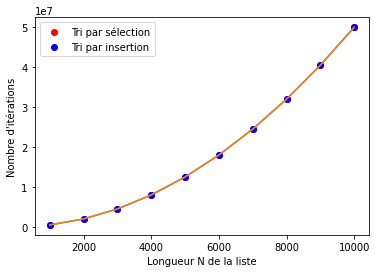

In [55]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def quadratique (x,a): # fonction quadratique de la forme y=f(a*x²) pour la modélisation
    return a*x*x

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 2 algorithme
# La liste abscisse contiendra les valeurs de n, les listes ordonnee1 et ordonnee2 contiendront les nombres d'itération des 2 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
modele1=[]
modele2=[]

inc=1000 # incrément de N
debut=1000 # première valeur de N
fin=11000 # valeur de fin pour N (non atteinte)
cas=2 #cas = 1 pour meilleur des cas (dejà trié), cas = 2 pour pire des cas (trié à l'envers) et cas = 3 pour cas moyen (aléatoire)
for N in range(debut,fin,inc): # la taille N du tableau varie de debut à fin par pas de inc
    print('N = ',N)
    abscisse.append(N) # N sera en abscisse
    if cas == 1 :
        L=sorted([randint(0,N) for k in range(N)]) # meilleur cas
    elif cas == 2 :
        L=sorted([randint(0,N) for k in range(N)], reverse=True) # pire cas
    elif cas == 3 :
        L=[randint(0,N) for k in range(N)] # cas moyen
    L1=tri_selection(L)
    ordonnee1.append(L1[1])
    L2=tri_insertion(L)
    ordonnee2.append(L2[1])
 
#calcul des paramètres de modélisation pour ordonnee1 et ordonnee2
parametres1, covariance = curve_fit(quadratique, abscisse, ordonnee1) 
parametres2, covariance = curve_fit(quadratique, abscisse, ordonnee2)

for i in range(len(abscisse)) : #construction des ordonnées pour les 2 modèles
    modele1.append(quadratique(abscisse[i],*parametres1))
    modele2.append(quadratique(abscisse[i],*parametres2))
    
# courbes pour les modèles avec légende    
plt.plot(abscisse,modele1)
plt.plot(abscisse,modele2)
print('Modele 1 : y = {:.2E}*N²'.format(*parametres1))
print('Modele 2 : y = {:.2E}*N²'.format(*parametres2))

# nom des axes    
plt.xlabel('Longueur N de la liste')
plt.ylabel("Nombre d'itérations")
# definition des courbes
plt.scatter(abscisse,ordonnee1,color='red', label='Tri par sélection')
plt.scatter(abscisse,ordonnee2,color='blue', label='Tri par insertion')
plt.legend()
#tracé du graphique
plt.show()

## 3. Preuve de la correction

### 3.1 Tri par sélection

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+1$ premiers éléments du tableau sont triés par ordre croissant et le reste du tableau (non trié) ne contient que des valeurs supérieures ou égales à celles déjà triées".

**Q6. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :**

*A compléter ...*

### 3.2 Tri par insertion

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+2$ premiers éléments du tableau sont triés par ordre croissant".

**Q7. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :** 

*A compléter ...*